In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import os
plt.style.use('lato_style.mplstyle')
import string


In [2]:
from IPython.display import Image

In [3]:
sim_snap = lambda i: 'hexagonal_system/relaxation/image_rotated_relax-from-image/pngs/{:03d}.png'.format(i)
exp_snap = lambda i: 'Romming_data/Pd_Fe_Ir111_configurations/{:03d}.png'.format(i)
im_snap = lambda i: 'Romming_data/Pd_Fe_Ir111_configurations/gimp/png/{:03d}.png'.format(i)

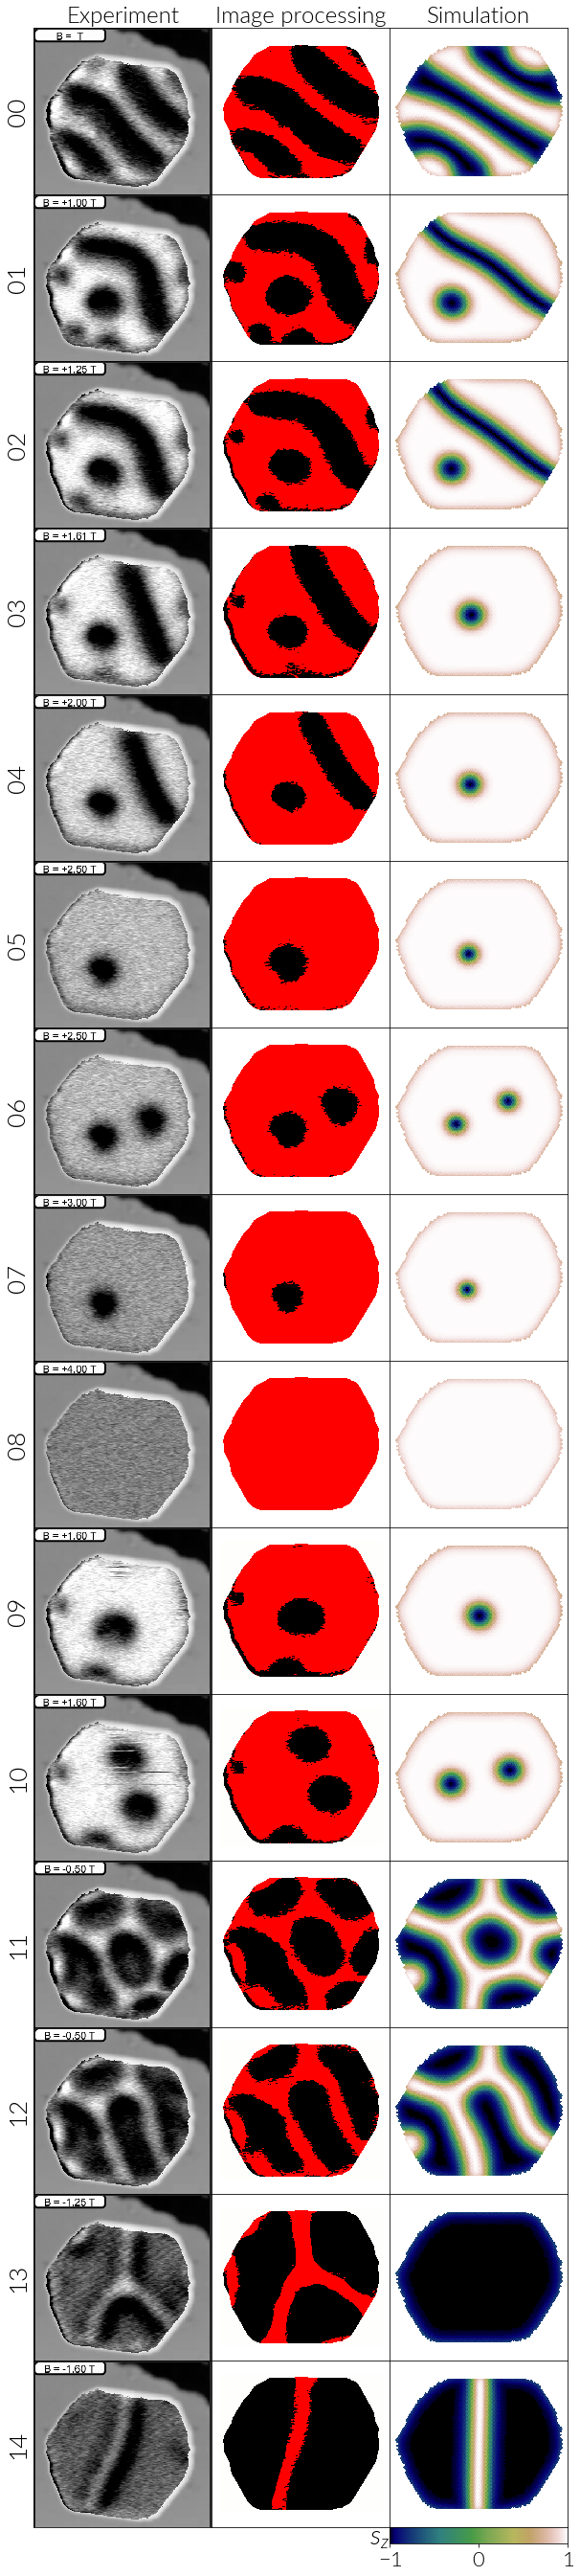

In [4]:
f, axs = plt.subplots(nrows=15, ncols=3, figsize=(10, 48))

for a in axs:
    for b in a:
        b.set_xticks([])
        b.set_yticks([])

for j, i in enumerate(range(15)):
    axs[j][0].imshow(plt.imread(exp_snap(i)), aspect='auto', cmap='gray')
    
    axs[j][1].imshow(plt.imread(im_snap(i)), aspect='auto', extent=[0, 1, 0, 1])
    axs[j][1].set_xlim(-.05, 1.05)
    axs[j][1].set_ylim(-0.1, 1.1)
    
    axs[j][2].imshow(plt.imread(sim_snap(i)), aspect='auto')
    
    if j == 0:
        axs[j][0].set_title('Experiment', fontweight='light', fontsize=24)
        axs[j][1].set_title('Image processing', fontweight='light', fontsize=24)
        axs[j][2].set_title('Simulation', fontweight='light', fontsize=24)
        
    axs[j][0].set_ylabel('{:02d}'.format(i))
        
# ------------------------------------
cmap = plt.cm.gist_earth
box = axs[14][2].get_position()
axCb = plt.axes([box.x0 - 0.03, box.y0 - 0.005, box.width + 0.03, 0.005])
cb = matplotlib.colorbar.ColorbarBase(axCb, cmap, orientation="horizontal",
                                      ticks=[-1, 0, 1],
                                      norm=matplotlib.colors.Normalize(vmin=-1, vmax=1))
cb.set_label(r'$s_{z}$', rotation=0, x=-0.06, labelpad=-45, fontsize=28)
axCb.tick_params(labelsize=22)
axCb.xaxis.set_ticks_position('bottom')
# ------------------------------------

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('image-rotated_PdFeIr111_images-snaps-fieldsweep.pdf', bbox_inches='tight')

# Compute the energies and top charge:

In [5]:
import matplotlib as m
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import fidimag
import sim_from_image as sfi
import os, re
import fidimag.common.constant as C
from fidimag.atomistic import UniformExchange, DMI, Anisotropy, DemagHexagonal
from fidimag.atomistic import Zeeman

In [7]:
mu_s = 'mu_s/Pd_Fe_Ir111_20160118_CrTip_015_B-4T_003_rotated_large_bw_mus3-muB.npy'

sim_from_image = sfi.sim_from_image(
    ('Romming_data/Pd_Fe_Ir111_configurations/gimp/png/000.png'),
    image_range=[0, 21.03, 0, 17.79],
    sim_name="rotated_exp_hexagon",
    bg_colour=(1, 1, 1)
    )
sim = sim_from_image.sim

if os.path.exists(mu_s):
    sim_from_image.generate_magnetic_moments(load_file=mu_s)
else:
    sim_from_image.generate_magnetic_moments(3 * C.mu_B)
    np.save(mu_s, sim.mu_s)

# sim_from_image.generate_magnetic_moments(3 * C.mu_B)

mask = (sim.mu_s / C.mu_B) > 1e-5
exch = UniformExchange(5.881 * C.meV)
sim.add(exch)
dmi = DMI(D=1.557 * C.meV, dmi_type='interfacial')
sim.add(dmi)
sim.add(Zeeman([0., 0., 0.]))
sim.add(Anisotropy(0.406 * C.meV, axis=[0, 0, 1]))

In [8]:
def sim_npy(i):
    fdir = ('hexagonal_system/relaxation/image_rotated_relax-from-image/npys/'
            '2Dhex_image-rotated_PdFe-Ir_configuration-{:03d}_npys/'.format(i))
    return fdir + os.listdir(fdir)[-1]

# Fields in tesla for each configuration
fields = [0, 1, 1.25, 1.61, 2, 2.5, 2.5, 3, 4, 1.60, 1.60, -0.5, -0.5, -1.25, -1.60]

In [9]:
Qs = []
for j, i in enumerate(range(15)):
    sim.set_m(np.load(sim_npy(i)))
    sim.get_interaction('Zeeman').update_field([0., 0., fields[i]])

    sim.compute_effective_field(t=0)
    e = sim.compute_energy() / C.eV
    Q = sim.skyrmion_number(method='BergLuscher')
    Qs.append(Q)
    
    print('State {} {:03d} at a field of B={:>5.2f} T | E = {:.5f} eV | Q = {:>5.2f}'.format(string.ascii_lowercase[i], i, fields[i], e, Q))

State a 000 at a field of B= 0.00 T | E = -80.58600 eV | Q =  0.18
State b 001 at a field of B= 1.00 T | E = -80.87136 eV | Q = -0.87
State c 002 at a field of B= 1.25 T | E = -80.98552 eV | Q = -0.87
State d 003 at a field of B= 1.61 T | E = -81.40821 eV | Q = -0.87
State e 004 at a field of B= 2.00 T | E = -81.69284 eV | Q = -0.88
State f 005 at a field of B= 2.50 T | E = -82.06344 eV | Q = -0.89
State g 006 at a field of B= 2.50 T | E = -82.00069 eV | Q = -1.89
State h 007 at a field of B= 3.00 T | E = -82.43829 eV | Q = -0.90
State i 008 at a field of B= 4.00 T | E = -83.27898 eV | Q =  0.09
State j 009 at a field of B= 1.60 T | E = -81.40099 eV | Q = -0.87
State k 010 at a field of B= 1.60 T | E = -81.36256 eV | Q = -1.87
State l 011 at a field of B=-0.50 T | E = -80.56495 eV | Q = -2.21
State m 012 at a field of B=-0.50 T | E = -80.62525 eV | Q = -0.80
State n 013 at a field of B=-1.25 T | E = -81.17227 eV | Q = -0.14
State o 014 at a field of B=-1.60 T | E = -81.21916 eV | Q = -

In [10]:
Qs

[0.17955857846526357,
 -0.8666983835469556,
 -0.8668163153371422,
 -0.868962463425888,
 -0.8787257106247838,
 -0.8892179143090072,
 -1.8892960485255705,
 -0.8979912955867883,
 0.08808940209314459,
 -0.8686845884997185,
 -1.8691120607127871,
 -2.2144235051367986,
 -0.7959668184627257,
 -0.1417321251210375,
 -0.11237371932247144]

In [11]:
for j, i in enumerate(range(15)):   
    # Energy of the fully polarised state
    sim.set_m((0, 0, 1))
    sim.get_interaction('Zeeman').update_field([0., 0., fields[i]])
    sim.compute_effective_field(t=0)
    e_FP = sim.compute_energy() / C.eV
    print(fields[i], e_FP)

0 -79.97738199999998
1 -80.76037639095357
1.25 -80.95612498869198
1.61 -81.23800296943526
2 -81.54337078190717
2.5 -81.93486797738396
2.5 -81.93486797738396
3 -82.32636517286076
4 -83.10935956381437
1.6 -81.23017302552573
1.6 -81.23017302552573
-0.5 -79.58588480452318
-0.5 -79.58588480452318
-1.25 -78.99863901130797
-1.6 -78.72459097447422


In [12]:
for j, i in enumerate(range(15)):
    sim.set_m(np.load(sim_npy(i)))
    sim.get_interaction('Zeeman').update_field([0., 0., fields[i]])

    sim.compute_effective_field(t=0)
    e = sim.compute_energy() / C.eV
    
    # Energy of the fully polarised state
    sim.set_m((0, 0, 1))
    sim.get_interaction('Zeeman').update_field([0., 0., fields[i]])
    sim.compute_effective_field(t=0)
    e_FP = sim.compute_energy() / C.eV
    
    print('State {:03d} at a field of B={:>5.2f} T. E - E_FP = {:.5f} eV'.format(i, fields[i], e - e_FP))

State 000 at a field of B= 0.00 T. E - E_FP = -0.60861 eV
State 001 at a field of B= 1.00 T. E - E_FP = -0.11098 eV
State 002 at a field of B= 1.25 T. E - E_FP = -0.02939 eV
State 003 at a field of B= 1.61 T. E - E_FP = -0.17021 eV
State 004 at a field of B= 2.00 T. E - E_FP = -0.14947 eV
State 005 at a field of B= 2.50 T. E - E_FP = -0.12857 eV
State 006 at a field of B= 2.50 T. E - E_FP = -0.06582 eV
State 007 at a field of B= 3.00 T. E - E_FP = -0.11192 eV
State 008 at a field of B= 4.00 T. E - E_FP = -0.16962 eV
State 009 at a field of B= 1.60 T. E - E_FP = -0.17082 eV
State 010 at a field of B= 1.60 T. E - E_FP = -0.13239 eV
State 011 at a field of B=-0.50 T. E - E_FP = -0.97906 eV
State 012 at a field of B=-0.50 T. E - E_FP = -1.03937 eV
State 013 at a field of B=-1.25 T. E - E_FP = -2.17363 eV
State 014 at a field of B=-1.60 T. E - E_FP = -2.49457 eV


(-1, 21)

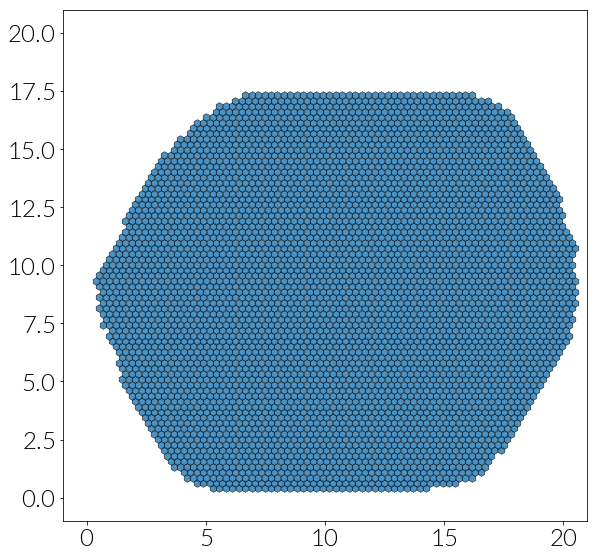

In [13]:
f = plt.figure(figsize=(9.4, 9.4))
ax = f.add_subplot(111)
ax.scatter(sim.mesh.coordinates[:, 0][mask], 
           sim.mesh.coordinates[:, 1][mask],
           # color=npt_cm.d_palette1[3],
           s=58, marker='h', linewidth=0.6, edgecolor='k',
           cmap='RdYlBu', vmin=-1, vmax=1,
           alpha=0.8
           )

plt.xlim([-1, 21])
plt.ylim([-1, 21])


# Image for publication

In [14]:
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

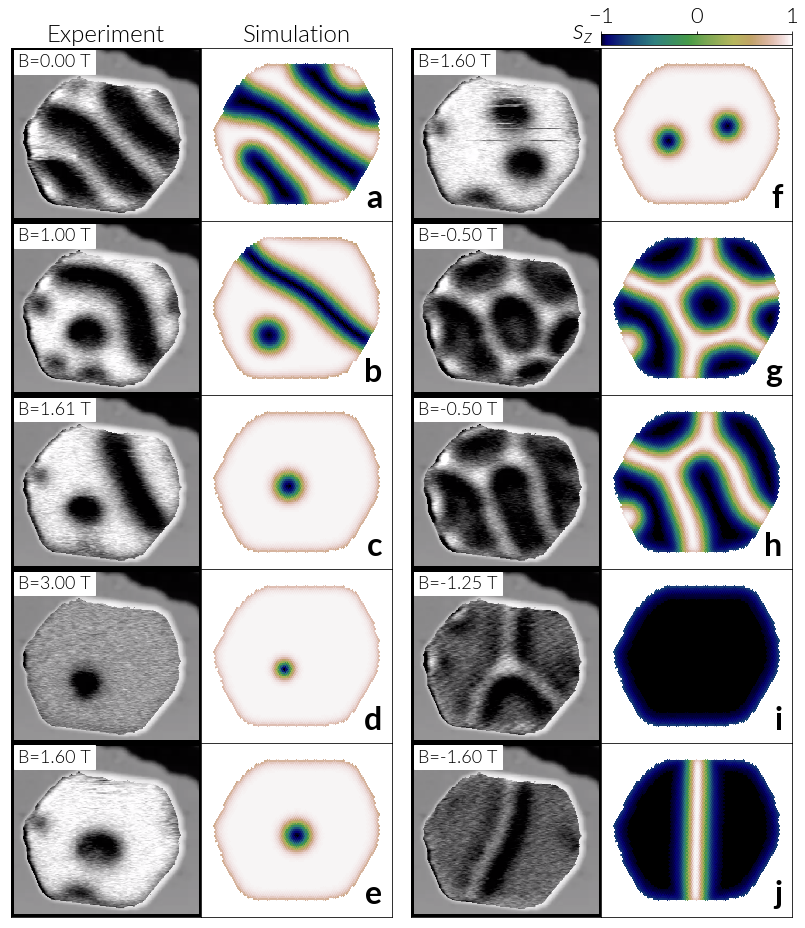

In [69]:
# f, axs = plt.subplots(nrows=10, ncols=2, figsize=(10, 32))

f = plt.figure(figsize=(14, 32))
axs = [None] * 20

outer = gridspec.GridSpec(1, 2, 
                          # height_ratios = [7, 2]
                          )
# Separation of the bottom row of plots from the top grid
outer.update(wspace=0.05)
gs1 = gridspec.GridSpecFromSubplotSpec(10, 2, subplot_spec = outer[0], wspace=0.,hspace=0.)
gs2 = gridspec.GridSpecFromSubplotSpec(10, 2, subplot_spec = outer[1], wspace=0.,hspace=0.)

for i in range(5):
    axs[2 * i] = plt.subplot(gs1[i:i + 1, :1])
    axs[2 * i + 1] = plt.subplot(gs1[i:i + 1, 1:])
    
for i in range(5):
    axs[2 * i + 10] = plt.subplot(gs2[i:i + 1, :1])
    axs[2 * i + 1 + 10] = plt.subplot(gs2[i:i + 1, 1:])
    
for a in axs:
    a.set_xticks([])
    a.set_yticks([])

labs = [0.0, 1.0, 1.61, 3.00, 1.60, 1.60, -0.5, -0.5, -1.25, -1.60]
    
for j, i in enumerate([0, 1, 2, 3, 5, 6, 7, 8, 9, 10]):
    axs[2 * j].imshow(plt.imread(exp_snap(i)), aspect='auto')
    
    axs[2 * j + 1].imshow(plt.imread(sim_snap(i)), aspect='auto')
    
    axs[2 * j].text(0.04, 0.965, 'B={:.2f} T'.format(labs[j]), 
                    horizontalalignment='left', verticalalignment='top', 
                    transform=axs[2 * j].transAxes, 
                    fontsize=18, fontweight='light', backgroundcolor='w')
    
    axs[2 * j + 1].text(0.95, 0.05, string.ascii_lowercase[j],
                        horizontalalignment='right', verticalalignment='bottom',
                        transform=axs[2 * j + 1].transAxes, 
                        fontsize=32, fontweight='bold')
    
#     if j == 0:
#         axs[j][0].set_title('Experiment', fontweight='light', fontsize=24)
#         axs[j][1].set_title('Simulation', fontweight='light', fontsize=24)
        
#     axs[j][0].set_ylabel('{:02d}'.format(i))
        
# ------------------------------------
cmap = plt.cm.gist_earth
box = axs[11].get_position()
axCb = plt.axes([box.x0, box.y1 + 0.001, box.width, 0.005])
cb = matplotlib.colorbar.ColorbarBase(axCb, cmap, orientation="horizontal",
                              ticks=[-1, 0, 1],
                              norm=matplotlib.colors.Normalize(vmin=-1, vmax=1))
cb.set_label(r'$s_{z}$', rotation=0, x=-0.1, labelpad=-25, fontsize=28)
axCb.tick_params(labelsize=22)
axCb.xaxis.set_ticks_position('top')
# ------------------------------------

axs[0].set_title('Experiment', fontweight='light', fontsize=24)
axs[1].set_title('Simulation', fontweight='light', fontsize=24)

plt.savefig('image-rotated_PdFeIr111_exp-sim-fieldsweep.jpg',
            bbox_inches='tight', dpi=200)

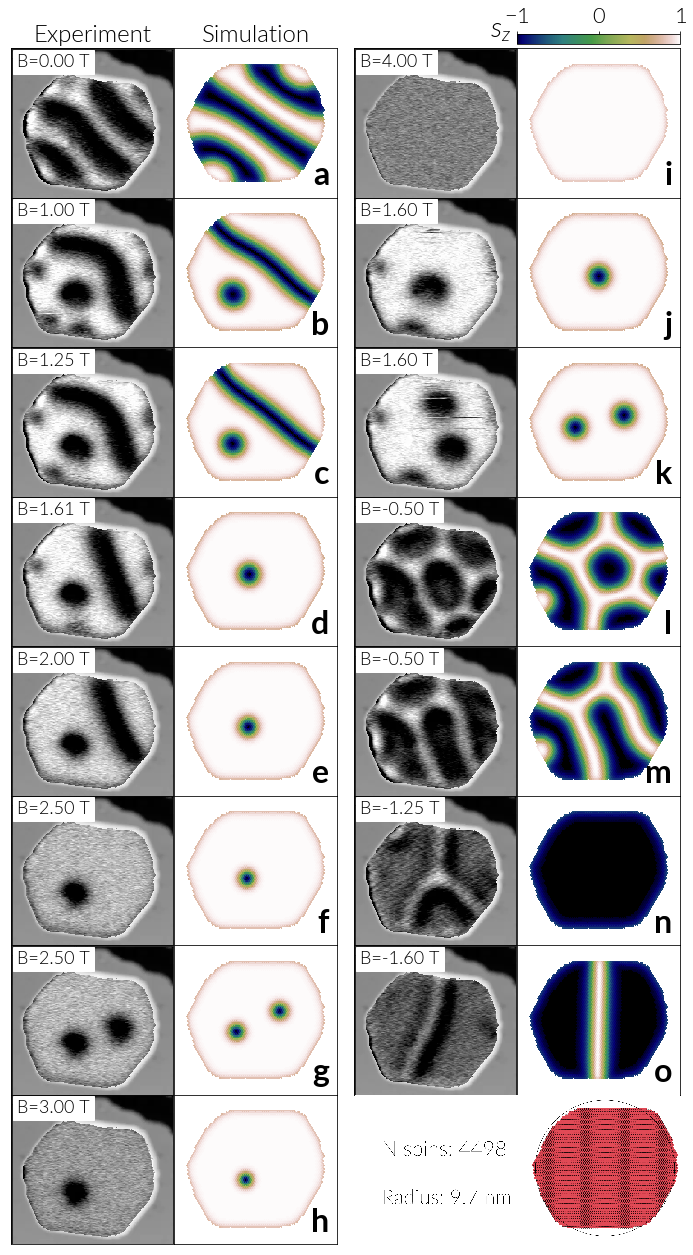

In [88]:
# f, axs = plt.subplots(nrows=10, ncols=2, figsize=(10, 32))

f = plt.figure(figsize=(12, 22))
axs = [None] * 31

outer = gridspec.GridSpec(1, 2, 
                          # height_ratios = [1, 2]
                          )
# Separation of the bottom row of plots from the top grid
outer.update(wspace=0.05)
gs1 = gridspec.GridSpecFromSubplotSpec(8, 2, subplot_spec = outer[0], wspace=0.,hspace=0.)
gs2 = gridspec.GridSpecFromSubplotSpec(8, 2, subplot_spec = outer[1], wspace=0.,hspace=0.)

for i in range(8):
    axs[2 * i] = plt.subplot(gs1[i:i + 1, :1])
    axs[2 * i + 1] = plt.subplot(gs1[i:i + 1, 1:])
    
for i in range(7):
    axs[2 * i + 16] = plt.subplot(gs2[i:i + 1, :1])
    axs[2 * i + 1 + 16] = plt.subplot(gs2[i:i + 1, 1:])
    
axs[30] = plt.subplot(gs2[7:, :])
    
for a in axs:
    a.set_xticks([])
    a.set_yticks([])

labs = [0, 1, 1.25, 1.61, 2, 2.5, 2.5, 3, 4, 1.60, 1.60, -0.5, -0.5, -1.25, -1.60]
    
for j, i in enumerate(range(15)):
    axs[2 * j].imshow(plt.imread(exp_snap(i)), aspect='auto', cmap='gray')
    
    axs[2 * j + 1].imshow(plt.imread(sim_snap(i)), aspect='auto', extent=[0, 1, 0, 1])
    axs[2 * j + 1].set_xlim(-0.05, 1.05)
    axs[2 * j + 1].set_ylim(0, 1)
    
    axs[2 * j].text(0.04, 0.965, 'B={:.2f} T'.format(labs[j]), 
                    horizontalalignment='left', verticalalignment='top', 
                    transform=axs[2 * j].transAxes, 
                    fontsize=18, fontweight='light', backgroundcolor='w')
    
    axs[2 * j + 1].text(0.95, 0.05, string.ascii_lowercase[j],
                        horizontalalignment='right', verticalalignment='bottom',
                        transform=axs[2 * j + 1].transAxes, 
                        fontsize=32, fontweight='bold')
    
axs[30].imshow(plt.imread('hex_island_image_rotated_atom-mesh_EDIT.png'), 
               # aspect='auto', 
               # zorder=0
               )
axs[30].set_axis_off()
# axs[20].set_ylim([0, 1300])

# ------------------------------------
cmap = plt.cm.gist_earth
box = axs[17].get_position()
axCb = plt.axes([box.x0, box.y1 + 0.003, box.width, 0.006])
cb = matplotlib.colorbar.ColorbarBase(axCb, cmap, orientation="horizontal",
                              ticks=[-1, 0, 1],
                              norm=matplotlib.colors.Normalize(vmin=-1, vmax=1))
cb.set_label(r'$s_{z}$', rotation=0, x=-0.1, labelpad=-25, fontsize=28)
axCb.tick_params(labelsize=22)
axCb.xaxis.set_ticks_position('top')
# ------------------------------------

axs[0].set_title('Experiment', fontweight='light', fontsize=24)
axs[1].set_title('Simulation', fontweight='light', fontsize=24)

plt.savefig('image-rotated_PdFeIr111_exp-sim-fieldsweep.jpg',
            bbox_inches='tight', dpi=400)

# Image for publication: again

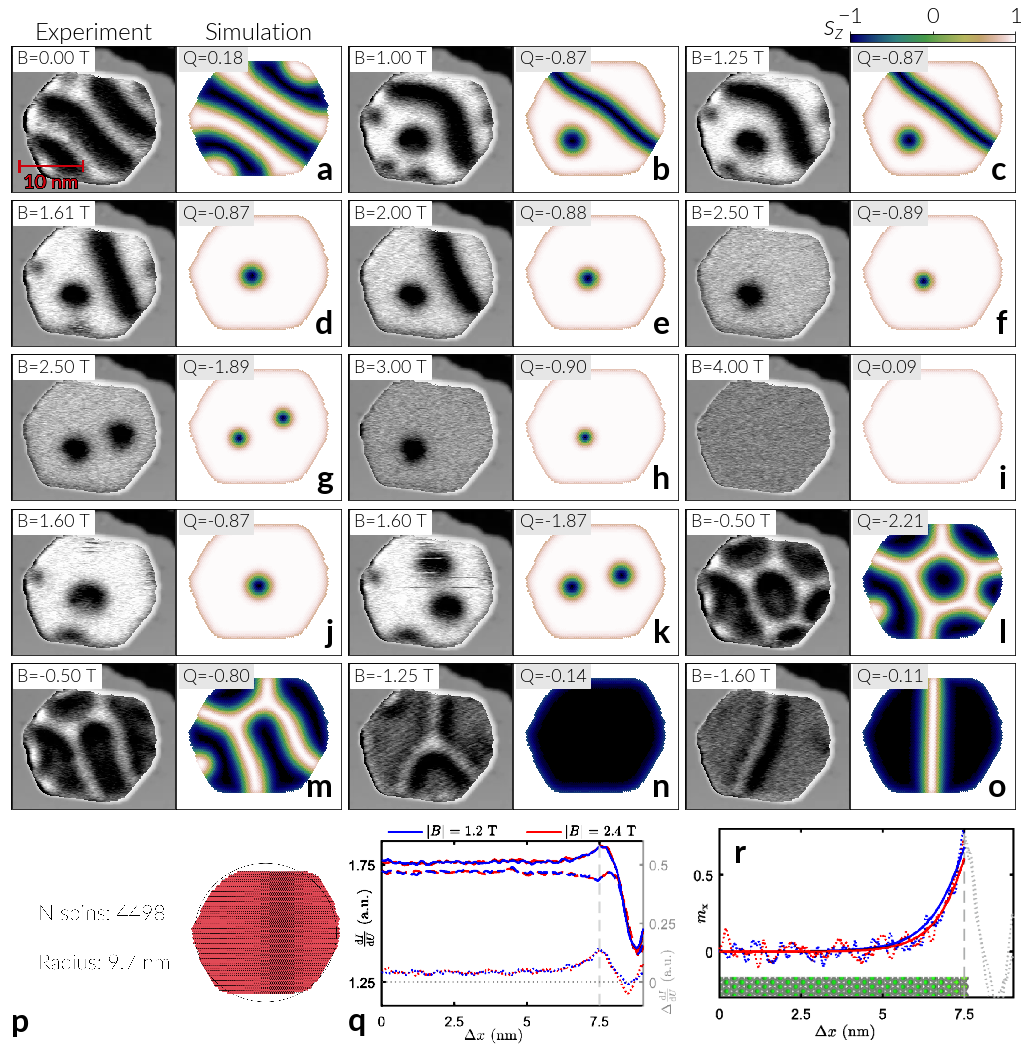

In [24]:
# f, axs = plt.subplots(nrows=10, ncols=2, figsize=(10, 32))

f = plt.figure(figsize=(18, 18.5))
axs = [None] * 33

outer = gridspec.GridSpec(6, 3, 
                          height_ratios = [1, 1, 1, 1, 1, 1.6]
                          )
# Separation of the bottom row of plots from the top grid
outer.update(wspace=0.02, hspace=0.05)

for j in range(5):
    for i in range(3):
        gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[3 * j + i],
                                              wspace=0.,hspace=0.)

        axs[6 * j + 2 * i] = plt.subplot(gs[:, :1])
        axs[6 * j + 2 * i + 1] = plt.subplot(gs[:, 1:])
    
for i in range(3):
    gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[15 + i],
                                          wspace=0.,hspace=0.)

    axs[30 + i] = plt.subplot(gs[:, :])
    # axs[18 + 2 * i + 1] = plt.subplot(gs[:, 1:])
    
# for i in range(7):
#     axs[2 * i + 16] = plt.subplot(gs2[i:i + 1, :1])
#     axs[2 * i + 1 + 16] = plt.subplot(gs2[i:i + 1, 1:])
    
# axs[30] = plt.subplot(gs2[7:, :])
    
for a in axs:
    a.set_xticks([])
    a.set_yticks([])

labs = [0, 1, 1.25, 1.61, 2, 2.5, 2.5, 3, 4, 1.60, 1.60, -0.5, -0.5, -1.25, -1.60]
Qs = [0.17955857846526357, -0.8666983835469556, -0.8668163153371422, -0.868962463425888,
      -0.8787257106247838, -0.8892179143090072, -1.8892960485255705, -0.8979912955867883,
      0.08808940209314459, -0.8686845884997185, -1.8691120607127871, -2.2144235051367986,
      -0.7959668184627257, -0.1417321251210375, -0.11237371932247144]
    
for j, i in enumerate(range(15)):
    axs[2 * j].imshow(plt.imread(exp_snap(i)), aspect='auto', cmap='gray')
    
    if j == 0:
        axs[2 * j].imshow(plt.imread('Romming_data/Pd_Fe_Ir111_configurations/scale_bar.png'),
                          aspect='auto')
    
    
    axs[2 * j + 1].imshow(plt.imread(sim_snap(i)), aspect='auto', extent=[0, 1, 0, 1])
    axs[2 * j + 1].set_xlim(-0.05, 1.05)
    axs[2 * j + 1].set_ylim(0, 1)
    
    axs[2 * j].text(0.04, 0.965, 'B={:.2f} T'.format(labs[j]), 
                    horizontalalignment='left', verticalalignment='top', 
                    transform=axs[2 * j].transAxes, 
                    fontsize=18, fontweight='light', backgroundcolor='w')
    
    # top charge
    axs[2 * j + 1].text(0.04, 0.965, 'Q={:.2f}'.format(Qs[j]), 
                        horizontalalignment='left', verticalalignment='top', 
                        transform=axs[2 * j + 1].transAxes, 
                        fontsize=18, fontweight='light', 
                        backgroundcolor=(.9, .9, .9)
                        )
    
    axs[2 * j + 1].text(0.95, 0.05, string.ascii_lowercase[j],
                        horizontalalignment='right', verticalalignment='bottom',
                        transform=axs[2 * j + 1].transAxes, 
                        fontsize=32, fontweight='bold')
    
axs[30].imshow(plt.imread('hex_island_image_rotated_atom-mesh_EDIT.png'), 
               # aspect='auto', 
               # zorder=0
               )

axs[31].imshow(plt.imread('NRomming_Fig_6_9_e_ED.png'))
axs[32].imshow(plt.imread('NRomming_Fig_6_9_f_ED.png'))

for i in [30, 31, 32]:
    axs[i].set_axis_off()
    
axs[30].text(0.0, -0.17, string.ascii_lowercase[15],
             horizontalalignment='left', verticalalignment='bottom',
             transform=axs[30].transAxes, 
             fontsize=32, fontweight='bold')

axs[31].text(0., 0.05, string.ascii_lowercase[16],
             horizontalalignment='left', verticalalignment='bottom',
             transform=axs[31].transAxes, 
             fontsize=32, fontweight='bold')

axs[32].text(0.15, 0.95, string.ascii_lowercase[17],
             horizontalalignment='left', verticalalignment='top',
             transform=axs[32].transAxes, 
             fontsize=32, fontweight='bold')

# ------------------------------------
cmap = plt.cm.gist_earth
box = axs[5].get_position()
axCb = plt.axes([box.x0, box.y1 + 0.003, box.width, 0.006])
cb = matplotlib.colorbar.ColorbarBase(axCb, cmap, orientation="horizontal",
                              ticks=[-1, 0, 1],
                              norm=matplotlib.colors.Normalize(vmin=-1, vmax=1))
cb.set_label(r'$s_{z}$', rotation=0, x=-0.1, labelpad=-25, fontsize=28)
axCb.tick_params(labelsize=22)
axCb.xaxis.set_ticks_position('top')
# ------------------------------------

axs[0].set_title('Experiment', fontweight='light', fontsize=24)
axs[1].set_title('Simulation', fontweight='light', fontsize=24)

plt.savefig('image-rotated_PdFeIr111_exp-sim-fieldsweep.jpg',
            bbox_inches='tight', dpi=200)